In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score
from sklearn import metrics

import random
from scipy import stats
from scipy.stats import mode, norm, skew
from math import sqrt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [130]:
# Read dataset
d = pd.read_csv('dataset.csv')
d

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


/Users/aycabasaran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

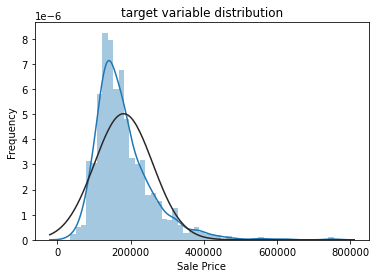

In [131]:
# checking to see if the data is distributed normally

import seaborn as sns
from scipy.stats import mode, norm, skew
sns.distplot(d['SalePrice'], fit= norm)
plt.title("target variable distribution")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")

In [132]:
d.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [133]:
# checking for null values

d.head()
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

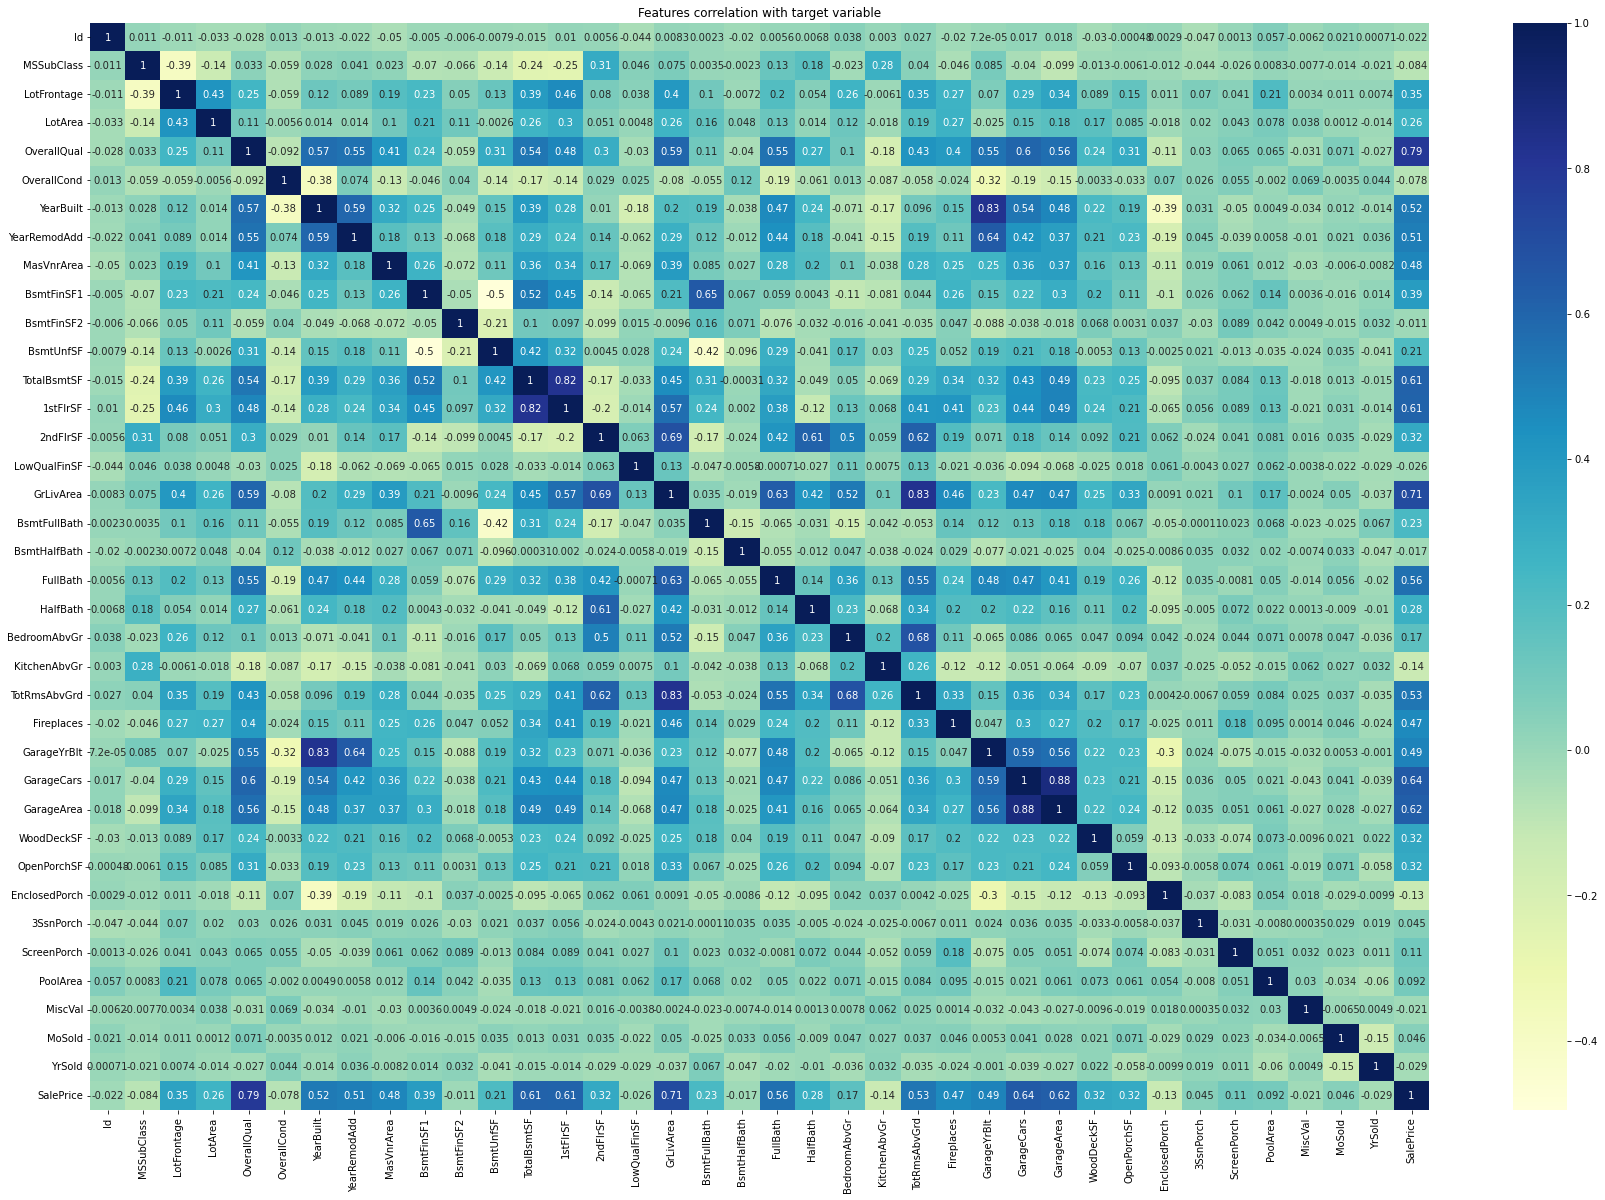

In [134]:
# checking for correlations 
correlation_matrix = d.corr()

plt.figure(figsize = (30, 20))
sns.heatmap(correlation_matrix, annot = True, cmap="YlGnBu")
plt.title("Features correlation with target variable")
plt.show()

In [135]:
# determining potential causes of multicollinearity & unrelated variables that can be dropped
low_corr=[]
high_corr=[]
titles=correlation_matrix.columns
corr_factor = 0.67
#corr_pairs = []
for i in titles:
    for j in titles:
        if ((correlation_matrix[i][j]>corr_factor ) and(i !="SalePrice" and j !="SalePrice") and (i!=j)):#or corr_matrix[i][j] < (-1*corr_factor)
            s=(i,j)
            conv = (j,i)
            if s not in high_corr and conv not in high_corr:
                high_corr.append(s)
print("High correlations futures:")
for i in range(len(high_corr)):
    print(high_corr[i])
#for i in titles:
    #print(i)
print("")
print("low correlations with Sales price:")
#corr_pairs = []
for i in titles:
    for j in titles:
        if (((correlation_matrix[i][j]<0.1) and (correlation_matrix[i][j]> -0.1)) and(i !="SalePrice" and j =="SalePrice") and (i!=j)):#or corr_matrix[i][j] < (-1*corr_factor)
            s=(i,j)
            conv = (j,i)
            if s not in high_corr and conv not in high_corr:
                low_corr.append(s)
for i in range(len(low_corr)):
    print(low_corr[i])

High correlations futures:
('YearBuilt', 'GarageYrBlt')
('TotalBsmtSF', '1stFlrSF')
('2ndFlrSF', 'GrLivArea')
('GrLivArea', 'TotRmsAbvGrd')
('BedroomAbvGr', 'TotRmsAbvGrd')
('GarageCars', 'GarageArea')

low correlations with Sales price:
('Id', 'SalePrice')
('MSSubClass', 'SalePrice')
('OverallCond', 'SalePrice')
('BsmtFinSF2', 'SalePrice')
('LowQualFinSF', 'SalePrice')
('BsmtHalfBath', 'SalePrice')
('3SsnPorch', 'SalePrice')
('PoolArea', 'SalePrice')
('MiscVal', 'SalePrice')
('MoSold', 'SalePrice')
('YrSold', 'SalePrice')


In [136]:
features_stat = d.isna().sum().rename('num_of_missing').reset_index()
features_stat.columns = ['feature', 'num_of_missing']
features_stat['percentage_of_missings'] = features_stat['num_of_missing'].apply(lambda x:x/len(d))
features_stat

,feature,num_of_missing,percentage_of_missings
0,Id,0,0.000000
1,MSSubClass,0,0.000000
2,MSZoning,0,0.000000
3,LotFrontage,259,0.177397
4,LotArea,0,0.000000
...,...,...,...
76,MoSold,0,0.000000
77,YrSold,0,0.000000
78,SaleType,0,0.000000
79,SaleCondition,0,0.000000


In [137]:
# feature with high percentage of missings
features_with_high_missings = features_stat[features_stat['percentage_of_missings'] >= 0.5]['feature'].tolist()
print(features_with_high_missings)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


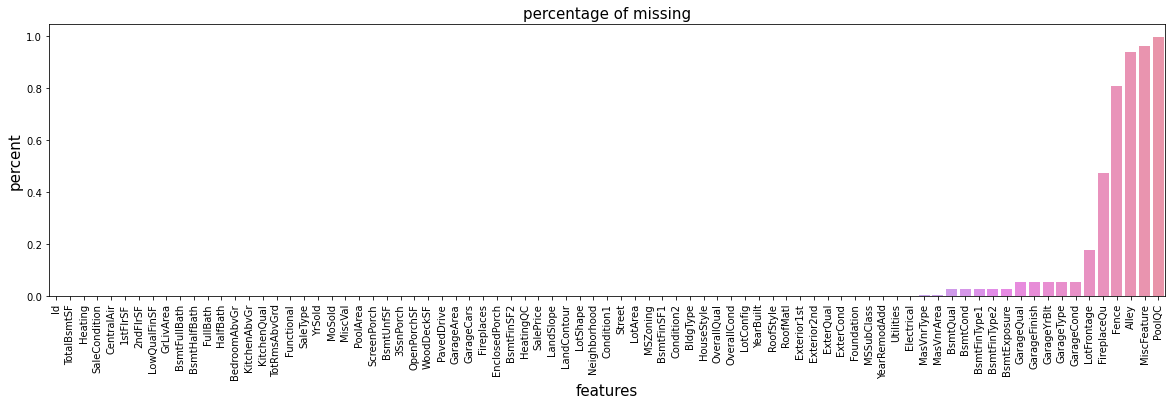

In [138]:
f, ax = plt.subplots(figsize=(20, 5))

sns.barplot(x='feature', y='percentage_of_missings', data=features_stat.sort_values(by='percentage_of_missings'))
plt.title('percentage of missing', fontsize=15)
plt.xlabel('features', fontsize=15)
plt.ylabel('percent', fontsize=15)
plt.xticks(rotation='90')
plt.show()

In [139]:
# dropping columns with very high % of missing values
d = d.drop(columns=['Id', 'FireplaceQu','Fence', 'Alley', 'MiscFeature', 'PoolQC'])
d


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [140]:
# seperating the variables according to data type - looking at the columns with missing values according to type
print("Quantitative columns with missing values -----------")
quantitatives = d.select_dtypes(exclude={'object'}).columns
print(set.intersection(set(features_stat[features_stat['percentage_of_missings']>0]['feature'].tolist()), set(quantitatives)))

print("Qualitative columns with missing values -----------")
qualitatives = d.select_dtypes(include={'object'}).columns
print(set.intersection(set(features_stat[features_stat['percentage_of_missings']>0]['feature'].tolist()), set(qualitatives)))

Quantitative columns with missing values -----------
{'GarageYrBlt', 'LotFrontage', 'MasVnrArea'}
Qualitative columns with missing values -----------
{'BsmtQual', 'Electrical', 'MasVnrType', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'GarageQual', 'GarageCond', 'GarageType', 'GarageFinish', 'BsmtFinType1'}


In [141]:
handling_missing_values = {
    'mean': ['LotFrontage', 'GarageYrBlt', 'MasVnrArea'],
    
    'mode': ['MasVnrType', 'GarageCond', 'BsmtQual', 'GarageQual', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'GarageFinish', 'GarageType', 'BsmtCond', 'Electrical']   
}

In [142]:
#With this code we can see all object columns
print (set(qualitatives))


{'ExterCond', 'LotConfig', 'LotShape', 'LandContour', 'BldgType', 'BsmtFinType2', 'Functional', 'PavedDrive', 'GarageCond', 'Heating', 'KitchenQual', 'BsmtQual', 'LandSlope', 'Exterior1st', 'Street', 'MasVnrType', 'HeatingQC', 'Condition2', 'Condition1', 'BsmtFinType1', 'ExterQual', 'RoofMatl', 'Utilities', 'Exterior2nd', 'Electrical', 'CentralAir', 'GarageQual', 'Foundation', 'GarageType', 'GarageFinish', 'SaleCondition', 'MSZoning', 'BsmtExposure', 'HouseStyle', 'BsmtCond', 'RoofStyle', 'SaleType', 'Neighborhood'}


In [143]:
# replacing the null values of numerical variables with averages and categorical variables with the modes

d['LotFrontage'].fillna((d['LotFrontage'].mean()), inplace=True)
d['MasVnrArea'].fillna((d['MasVnrArea'].mean()), inplace=True)
d['GarageYrBlt'].fillna((d['GarageYrBlt'].mean()), inplace=True)

d['MasVnrType'].fillna((d['MasVnrType'].mode()), inplace=True)
d['GarageCond'].fillna((d['GarageCond'].mode()), inplace=True)
d['BsmtQual'].fillna((d['BsmtQual'].mode()), inplace=True)
d['GarageQual'].fillna((d['GarageQual'].mode()), inplace=True)
d['BsmtFinType2'].fillna((d['BsmtFinType2'].mode()), inplace=True)
d['BsmtFinType1'].fillna((d['BsmtFinType1'].mode()), inplace=True)
d['BsmtExposure'].fillna((d['BsmtExposure'].mode()), inplace=True)
d['GarageType'].fillna((d['GarageType'].mode()), inplace=True)
d['GarageFinish'].fillna((d['GarageFinish'].mode()), inplace=True)
d['BsmtCond'].fillna((d['BsmtCond'].mode()), inplace=True)
d['Electrical'].fillna((d['Electrical'].mode()), inplace=True)




In [144]:
# checking to confirm no null values are left
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [145]:
# looking at highly correlated variables to determine whether there is a multicollinearity problem 

import statsmodels.stats.outliers_influence

A = d[['GrLivArea', 'TotRmsAbvGrd']]

vif_data = pd.DataFrame()
vif_data["feature"] = A.columns

vif_data["VIF"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(A.values, i)
                          for i in range(len(A.columns))]
  
print(vif_data)


        feature        VIF
0     GrLivArea  28.319495
1  TotRmsAbvGrd  28.319495


In [146]:
A = d[['TotalBsmtSF', '1stFlrSF']]

vif_data = pd.DataFrame()
vif_data["feature"] = A.columns

vif_data["VIF"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(A.values, i)
                          for i in range(len(A.columns))]
  
print(vif_data)

       feature        VIF
0  TotalBsmtSF  20.731561
1     1stFlrSF  20.731561


In [147]:
A = d[['2ndFlrSF', 'GrLivArea']]

vif_data = pd.DataFrame()
vif_data["feature"] = A.columns

vif_data["VIF"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(A.values, i)
                          for i in range(len(A.columns))]
  
print(vif_data)

     feature       VIF
0   2ndFlrSF  2.404704
1  GrLivArea  2.404704


In [148]:
A = d[['BedroomAbvGr', 'TotRmsAbvGrd']]

vif_data = pd.DataFrame()
vif_data["feature"] = A.columns

vif_data["VIF"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(A.values, i)
                          for i in range(len(A.columns))]
  
print(vif_data)

        feature        VIF
0  BedroomAbvGr  23.037365
1  TotRmsAbvGrd  23.037365


In [149]:
A = d[['GarageCars', 'GarageArea']]

vif_data = pd.DataFrame()
vif_data["feature"] = A.columns

vif_data["VIF"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(A.values, i)
                          for i in range(len(A.columns))]
  
print(vif_data)

      feature        VIF
0  GarageCars  26.370836
1  GarageArea  26.370836


In [150]:
# dropiing variables that cause multicollinearity
d = d.drop(columns=['GarageCars', 'TotRmsAbvGrd','1stFlrSF', 'TotRmsAbvGrd', 'MSSubClass', 'OverallCond', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])
d

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,0,61,0,0,WD,Normal,208500
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,298,0,0,0,WD,Normal,181500
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,0,42,0,0,WD,Normal,223500
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,0,35,272,0,WD,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,192,84,0,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,TA,TA,Y,0,40,0,0,WD,Normal,175000
1456,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,TA,TA,Y,349,0,0,0,WD,Normal,210000
1457,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,TA,TA,Y,0,60,0,0,WD,Normal,266500
1458,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,366,0,112,0,WD,Normal,142125


In [151]:
print(d.columns)
qualitatives = d.select_dtypes(include={'object'}).columns
print(qualitatives)

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Stree

In [152]:
#Using one hot encoding on categorical values
object_columns = d.select_dtypes(include=['object'])

#One hot encoder
d_cut = pd.get_dummies(d, columns=object_columns.columns) 
d_cut


,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,2003,2003,196.0,706,150,856,854,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,1976,1976,0.0,978,284,1262,0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,2001,2002,162.0,486,434,920,866,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,1915,1970,0.0,216,540,756,756,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1053,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,953,953,694,...,0,0,0,1,0,0,0,0,1,0
1456,85.0,13175,6,1978,1988,119.0,790,589,1542,0,...,0,0,0,1,0,0,0,0,1,0
1457,66.0,9042,7,1941,2006,0.0,275,877,1152,1152,...,0,0,0,1,0,0,0,0,1,0
1458,68.0,9717,5,1950,1996,0.0,49,0,1078,0,...,0,0,0,1,0,0,0,0,1,0


In [153]:
d_cut.head()
d_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 258 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(21), uint8(234)
memory usage: 607.5 KB


In [154]:
# trying various regression models to see which one performs best
from sklearn.model_selection import train_test_split, cross_val_score

X = d_cut.drop("SalePrice", axis=1)
y = d_cut["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#LINEAR REGRESSION

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared


models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)



MAE: 18805.024471349672
MSE: 915506705.6541018
RMSE: 30257.34135138284
R2 Score: 0.8806430546856966
------------------------------
RMSE Cross-Validation: 34470.2992838642


/var/folders/y1/ndm11cz11wn06xl_h3rjsb680000gn/T/ipykernel_34143/952902258.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [155]:
#RIDGE REGRESSION
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 18939.483712415924
MSE: 870261395.7550247
RMSE: 29500.193147757942
R2 Score: 0.8865418011896826
------------------------------
RMSE Cross-Validation: 31934.067628587585


/var/folders/y1/ndm11cz11wn06xl_h3rjsb680000gn/T/ipykernel_34143/4265103120.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [156]:
#LASSO REGRESSION
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

/Users/aycabasaran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.123e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
/Users/aycabasaran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.706e+11, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(


MAE: 18379.349502830548
MSE: 836046681.2532008
RMSE: 28914.471830783987
R2 Score: 0.8910024608249618
------------------------------


/Users/aycabasaran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.561e+11, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
/Users/aycabasaran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.107e+11, tolerance: 6.990e+08
  model = cd_fast.enet_coordinate_descent(


RMSE Cross-Validation: 33404.572552990096


/Users/aycabasaran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.715e+11, tolerance: 7.706e+08
  model = cd_fast.enet_coordinate_descent(
/Users/aycabasaran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.159e+11, tolerance: 7.249e+08
  model = cd_fast.enet_coordinate_descent(
/var/folders/y1/ndm11cz11wn06xl_h3rjsb680000gn/T/ipykernel_34143/125974436.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_inde

In [157]:
#RANDOM FOREST REGRESSION
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 18242.949657534245
MSE: 841572118.1926618
RMSE: 29009.862429743815
R2 Score: 0.8902820955119085
------------------------------
RMSE Cross-Validation: 29337.184265375116


/var/folders/y1/ndm11cz11wn06xl_h3rjsb680000gn/T/ipykernel_34143/2244778151.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [158]:
#SVR REGRESSION
from sklearn.svm import SVR

svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 28722.271853710772
MSE: 2332236544.281853
RMSE: 48293.234974288614
R2 Score: 0.6959403705547049
------------------------------
RMSE Cross-Validation: 44208.92209154398


/var/folders/y1/ndm11cz11wn06xl_h3rjsb680000gn/T/ipykernel_34143/3721917882.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [159]:
# comparing the different models according to accuracy (r2 score) and the root mean squared error
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
3,RandomForestRegressor,18242.949658,841572118.192662,29009.86243,0.890282,29337.184265
1,Ridge,18939.483712,870261395.755025,29500.193148,0.886542,31934.067629
2,Lasso,18379.349503,836046681.253201,28914.471831,0.891002,33404.572553
0,LinearRegression,18805.024471,915506705.654102,30257.341351,0.880643,34470.299284
4,SVR,28722.271854,2332236544.281853,48293.234974,0.69594,44208.922092


In [162]:
# # Accuracy

# from sklearn.metrics import accuracy_score
# from sklearn.metrics import roc_auc_score

# X = d_cut.drop('SalePrice', axis=1)
# Y = d_cut['SalePrice']


# trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state=42)

# trainX = X 
# trainY = Y

# testX = d_cut.drop(columns=['SalePrice'])
# testY = d_cut['SalePrice']

# clf = linear_model.LogisticRegression()
# clf.fit(trainX, trainY)
# predY = clf.predict(testX)

# # - Accuracy: number of correct predictions divided by the number of samples

# print(accuracy_score(testY, predY))

0.04726027397260274


/Users/aycabasaran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
